In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset.
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')

In [3]:
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


# Exploratory Data Analysis

In [5]:
# Checking the dimensions of the dataset.
df.shape

(7752, 25)

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
# Checking types of columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
missing_values = df.isnull().sum()
(missing_values/len(df))*100

station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

Since we have such a large dataset and the missing values are less than 1%, so we can drop these values.

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(7588, 25)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64
 17  

In [13]:
df.duplicated().sum()

0

In [14]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


<Axes: >

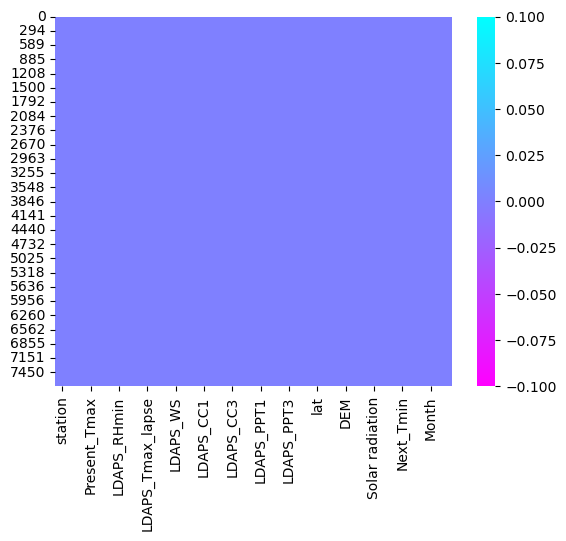

In [15]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

In [16]:
# Checking value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64


Date
2013-06-30    25
2016-07-23    25
2015-08-22    25
2015-08-23    25
2015-08-24    25
              ..
2015-08-13    22
2015-07-24    22
2017-07-06    22
2017-08-23    22
2017-06-30    16
Name: count, Length: 307, dtype: int64


Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64


Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64


LDAPS_RHmin
77.030350    2
51.810596    2
71.658089    2
58

# Description of Dataset 

In [17]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7588.000000,7588,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,2015-07-27 18:22:12.208750592,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,15.939510,7.465999,2014.991697
min,1.000000,2013-06-30 00:00:00,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,6.000000,2013.000000
25%,7.000000,2014-07-15 00:00:00,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,2015-07-29 00:00:00,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,2016-08-14 00:00:00,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,2017-08-30 00:00:00,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,8.000000,2017.000000
std,7.217858,NaN,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.906521,0.528635,1.410877


# Data Visualization

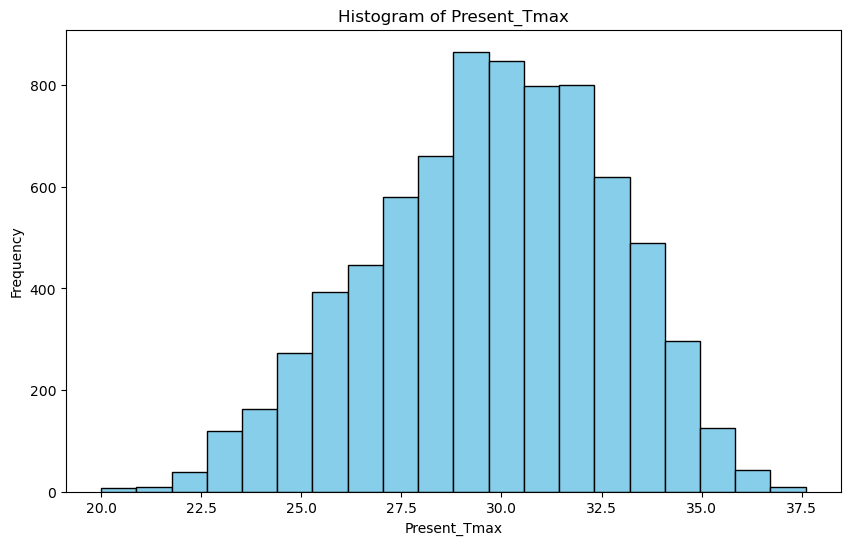

In [18]:
# Plot histogram for Present_Tmax
plt.figure(figsize=(10, 6))
plt.hist(df['Present_Tmax'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Present_Tmax')
plt.xlabel('Present_Tmax')
plt.ylabel('Frequency')
plt.show()

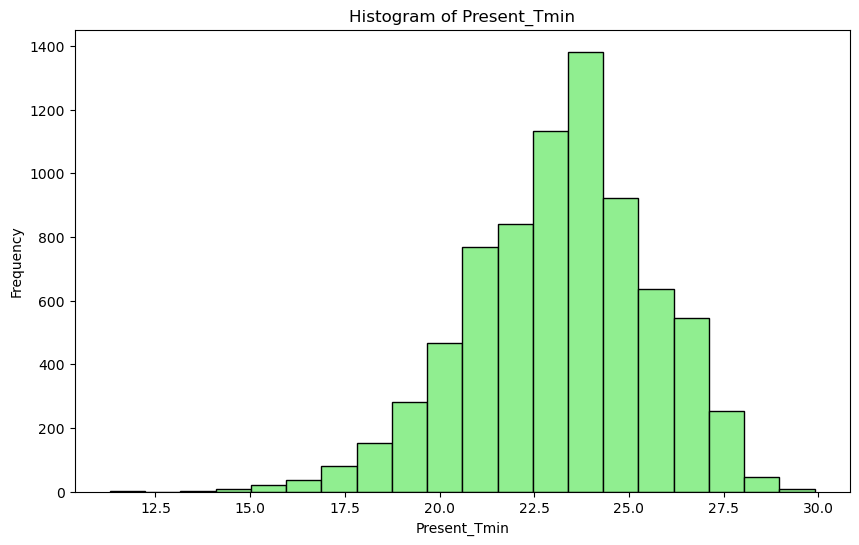

In [19]:
# Plot histogram for Present_Tmin
plt.figure(figsize=(10, 6))
plt.hist(df['Present_Tmin'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Present_Tmin')
plt.xlabel('Present_Tmin')
plt.ylabel('Frequency')
plt.show()

In [20]:
print(df.Present_Tmax.max())
print(df.Present_Tmax.min())
print(df.Present_Tmax.mean())

37.6
20.0
29.748365840801263


In [21]:
print(df.Present_Tmin.max())
print(df.Present_Tmin.min())
print(df.Present_Tmin.mean())

29.9
11.3
23.195809172377437


### Let's check where these maximum and minimum are present.

In [22]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
5717,18.0,2016-08-11,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,0.218892,0.094288,0.004283,0.000343,0.0,0.0,0.0,0.0,37.4832,127.024,56.4448,1.2313,5082.563477,37.0,27.8,11,8,2016


Present maximum temperature Maxima was recorded on station 18 on 2016-08-11 with temperature of 37.6 degrees.

In [23]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
7725,1.0,2017-08-30,20.0,15.1,35.652172,89.97319,24.323737,16.128899,7.087329,108.981108,0.046182,0.014955,0.0,0.00063,0.0,0.0,0.0,0.0,37.6046,126.991,212.335,2.785,4614.76123,23.8,15.1,30,8,2017


Present maximum temperature Minima was recorded at station 1 on 2017-08-30 with temperature of 20 degrees.

In [24]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
2397,23.0,2014-08-02,35.3,29.9,53.946949,85.985161,30.912804,25.439537,13.011129,117.837212,0.684685,0.448827,0.762858,0.635728,1.670126,0.005681,0.248885,0.003176,37.5372,126.891,15.5876,0.1554,5360.226563,31.3,24.8,2,8,2014


Present minimum temperature Maxima was recorded at station 23 on 2014-08-02 with temperature of 29.9 degrees.

In [25]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
6116,17.0,2016-08-27,27.1,11.3,62.793823,91.726936,23.529546,17.963487,7.984566,84.48145,0.668264,0.410536,0.452879,0.627238,0.181458,0.0,0.405181,1.015573,37.6181,127.099,53.4712,0.697,4539.616699,24.6,17.1,27,8,2016


Present minimum temperature Minima was recorded at station 17 on 2016-08-27 with the temperature of 11.3 degrees only.

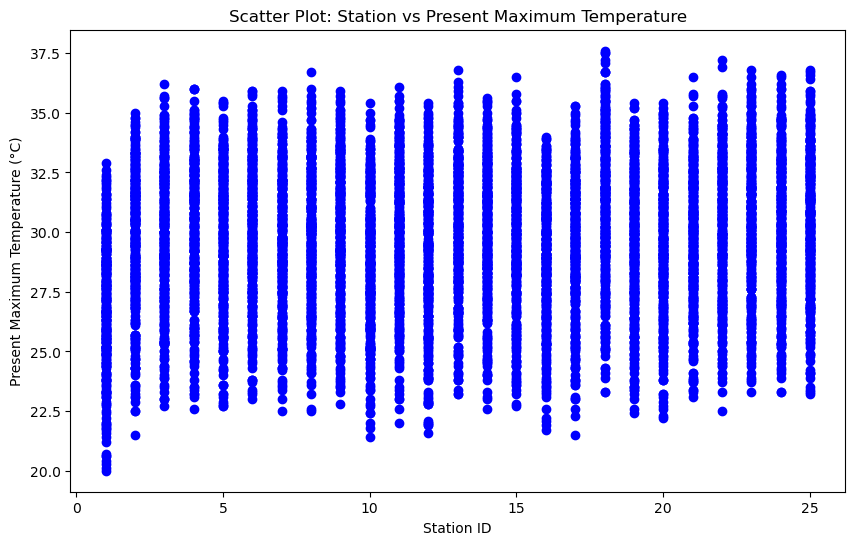

In [26]:
# Plot scatter plot for Station vs Present_Tmax
plt.figure(figsize=(10, 6))
plt.scatter(df['station'], df['Present_Tmax'], color='blue')
plt.title('Scatter Plot: Station vs Present Maximum Temperature')
plt.xlabel('Station ID')
plt.ylabel('Present Maximum Temperature (°C)')
plt.show()

We can see that the minimum temperature was at station 1 and maximum temperature was at station 18.

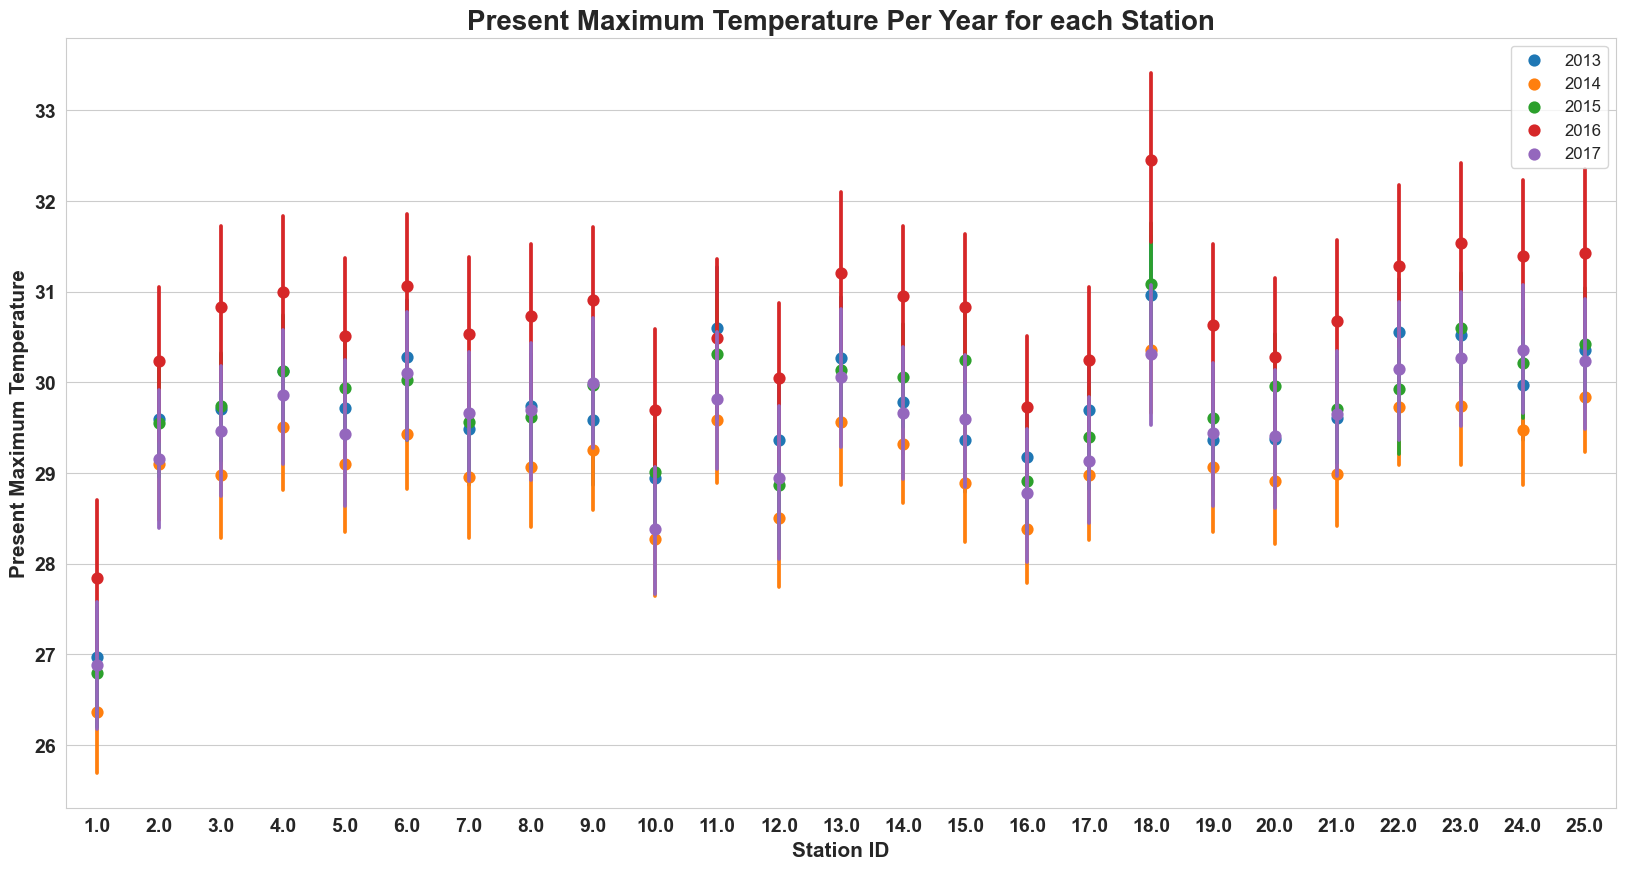

In [27]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=20, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.legend(fontsize=12)

We can clearly see that year 2016 is the hottest year. Year 2014 appears to be cooler followed by year 2017.

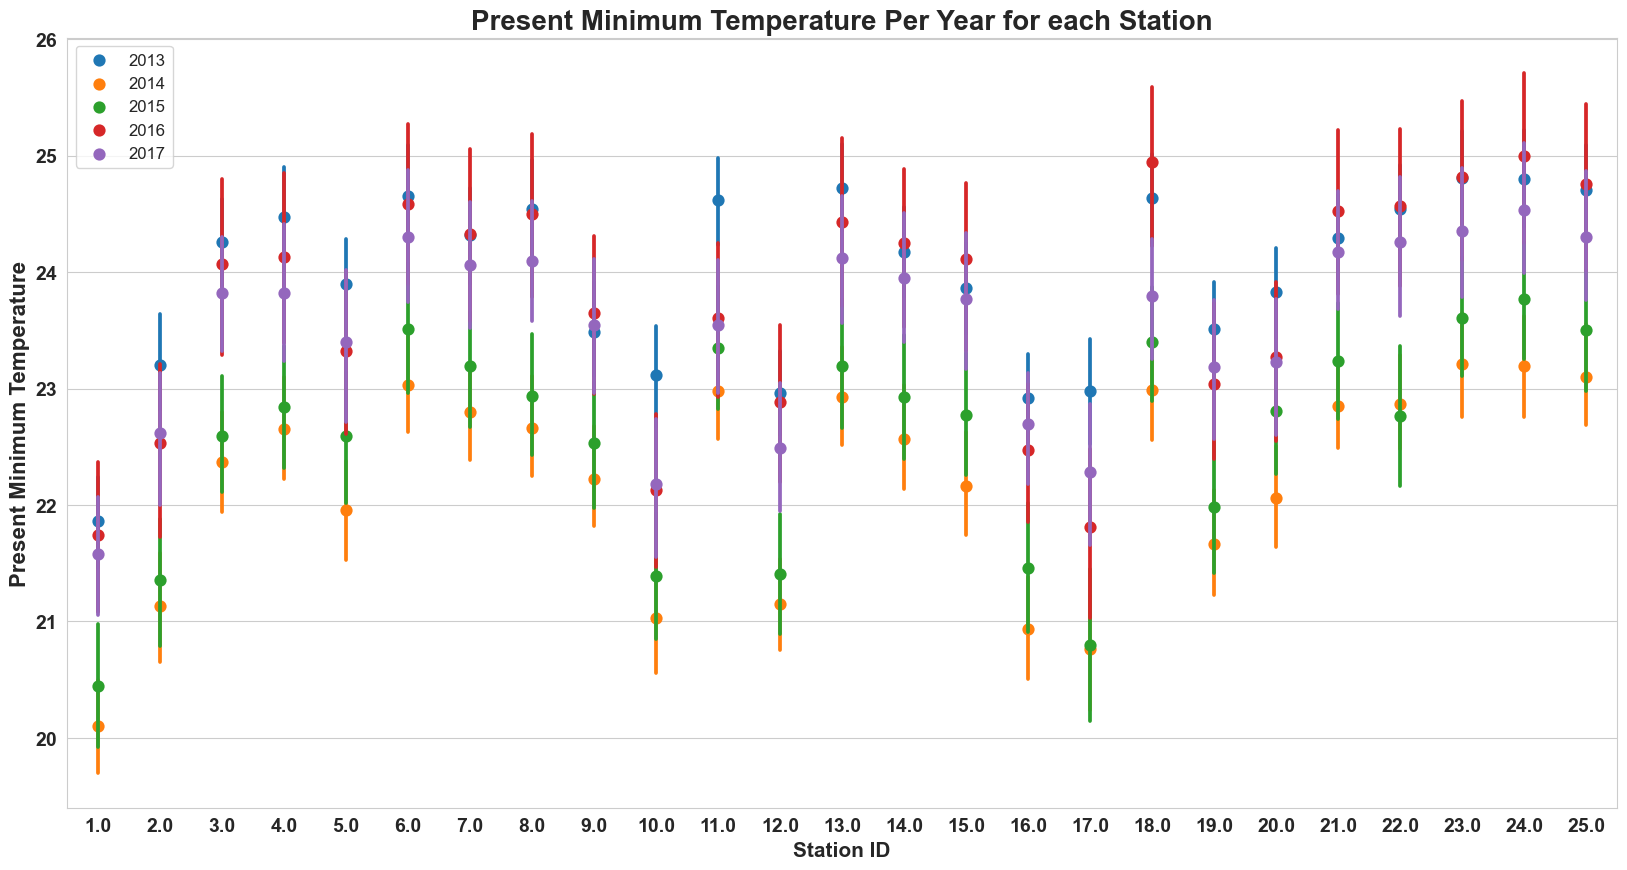

In [28]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=20, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':16,'fontweight' :'bold'})
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.legend(fontsize=12)

Year 2014 seems to be the coolest year among the rest.

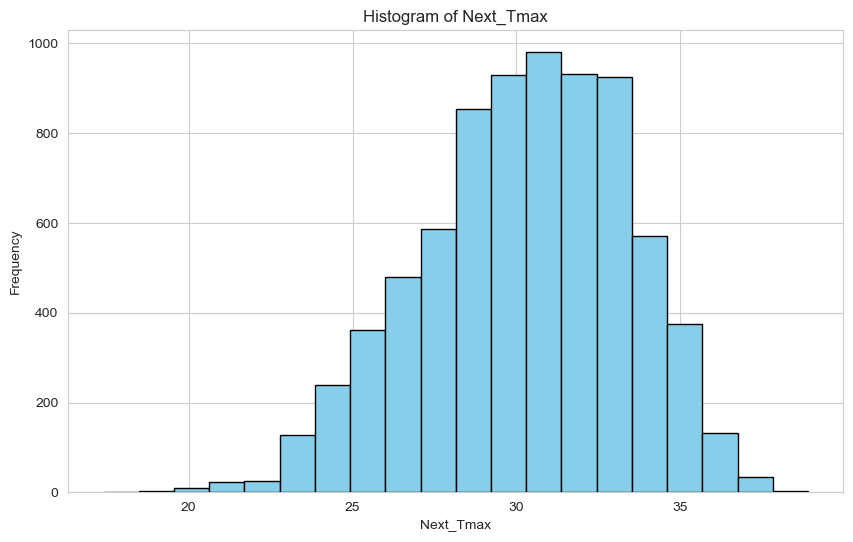

In [29]:
# Plot histogram for Next_Tmax
plt.figure(figsize=(10, 6))
plt.hist(df['Next_Tmax'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Next_Tmax')
plt.xlabel('Next_Tmax')
plt.ylabel('Frequency')
plt.show()

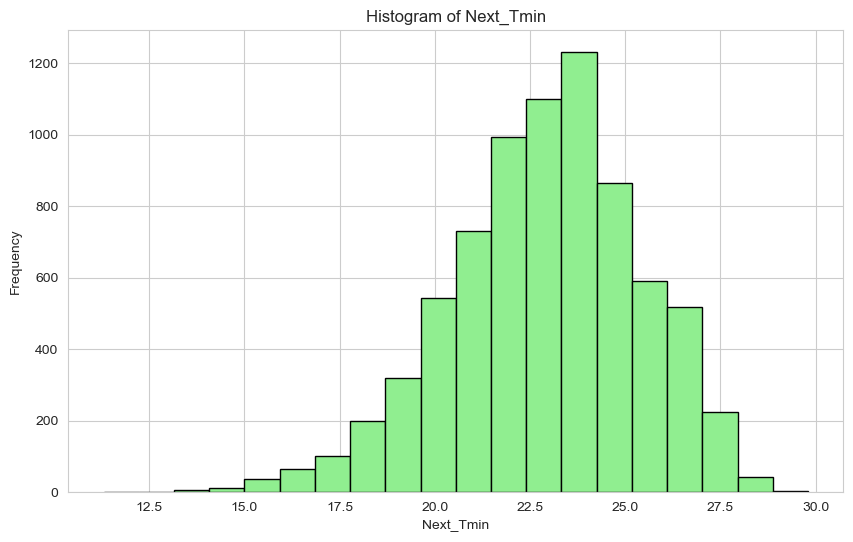

In [30]:
# Plot histogram for Next_Tmin
plt.figure(figsize=(10, 6))
plt.hist(df['Next_Tmin'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Next_Tmin')
plt.xlabel('Next_Tmin')
plt.ylabel('Frequency')
plt.show()

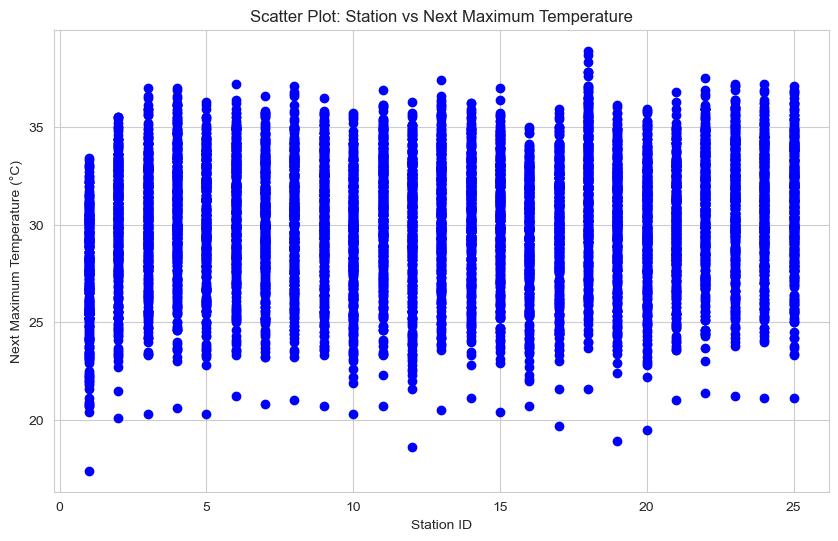

In [31]:
# Plot scatter plot for Station vs Next_Tmax
plt.figure(figsize=(10, 6))
plt.scatter(df['station'], df['Next_Tmax'], color='blue')
plt.title('Scatter Plot: Station vs Next Maximum Temperature')
plt.xlabel('Station ID')
plt.ylabel('Next Maximum Temperature (°C)')
plt.grid(True)
plt.show()

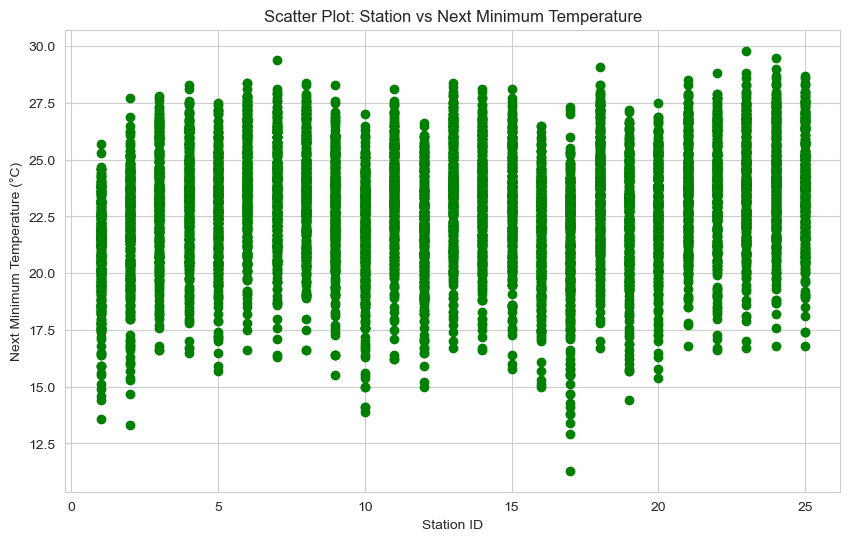

In [32]:
# Plot scatter plot for Station vs Next_Tmin
plt.figure(figsize=(10, 6))
plt.scatter(df['station'], df['Next_Tmin'], color='green')
plt.title('Scatter Plot: Station vs Next Minimum Temperature')
plt.xlabel('Station ID')
plt.ylabel('Next Minimum Temperature (°C)')
plt.grid(True)
plt.show()

We can see that station 18 has the maximum temperature in both cases.

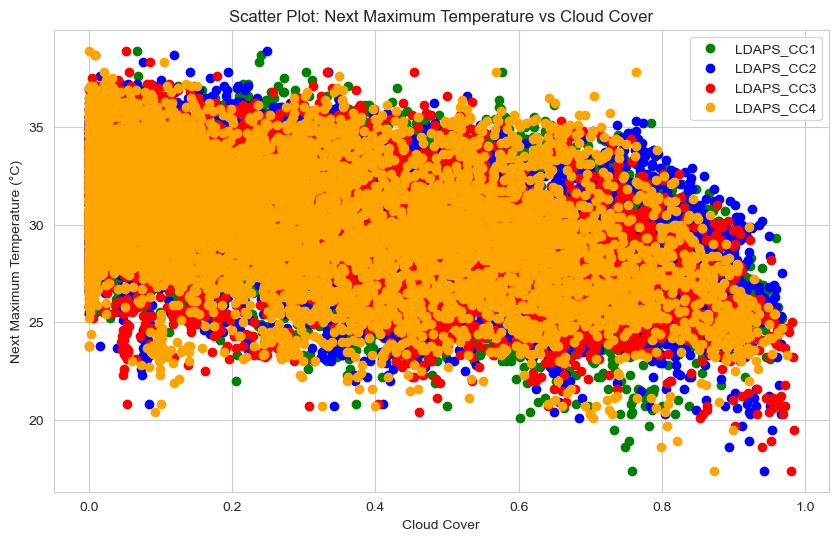

In [33]:
# Plot scatter plot for Next Maximum Temperature vs Cloud Cover
plt.figure(figsize=(10, 6))
plt.scatter(df['LDAPS_CC1'], df['Next_Tmax'], color='green', label='LDAPS_CC1')
plt.scatter(df['LDAPS_CC2'], df['Next_Tmax'], color='blue', label='LDAPS_CC2')
plt.scatter(df['LDAPS_CC3'], df['Next_Tmax'], color='red', label='LDAPS_CC3')
plt.scatter(df['LDAPS_CC4'], df['Next_Tmax'], color='orange', label='LDAPS_CC4')

plt.title('Scatter Plot: Next Maximum Temperature vs Cloud Cover')
plt.xlabel('Cloud Cover')
plt.ylabel('Next Maximum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

We can see that as the cloud cover increases, the next day maximum temperature decreases.

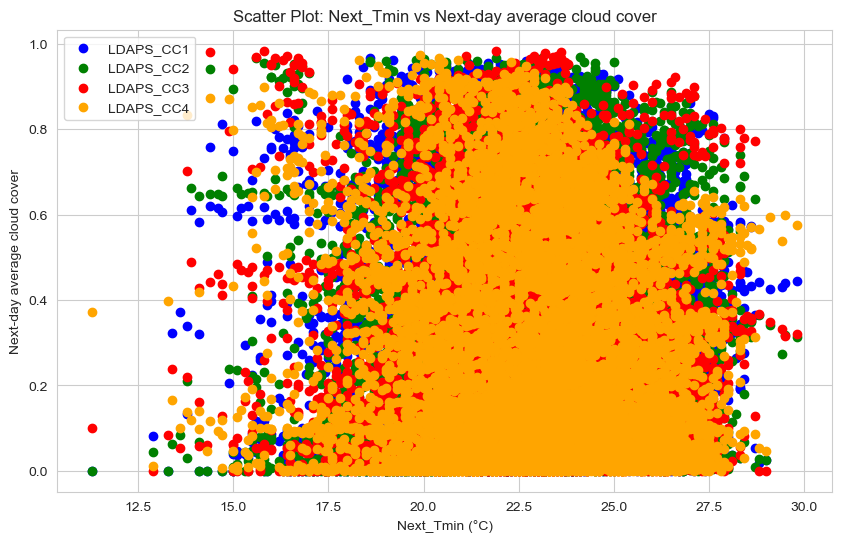

In [34]:
# Plot scatter plot for Next_Tmin vs Next-day average cloud cover
plt.figure(figsize=(10, 6))
plt.scatter(df['Next_Tmin'], df['LDAPS_CC1'], color='blue', label='LDAPS_CC1')
plt.scatter(df['Next_Tmin'], df['LDAPS_CC2'], color='green', label='LDAPS_CC2')
plt.scatter(df['Next_Tmin'], df['LDAPS_CC3'], color='red', label='LDAPS_CC3')
plt.scatter(df['Next_Tmin'], df['LDAPS_CC4'], color='orange', label='LDAPS_CC4')

plt.title('Scatter Plot: Next_Tmin vs Next-day average cloud cover')
plt.xlabel('Next_Tmin (°C)')
plt.ylabel('Next-day average cloud cover')
plt.legend()
plt.grid(True)
plt.show()

Not much significant relation is seen.

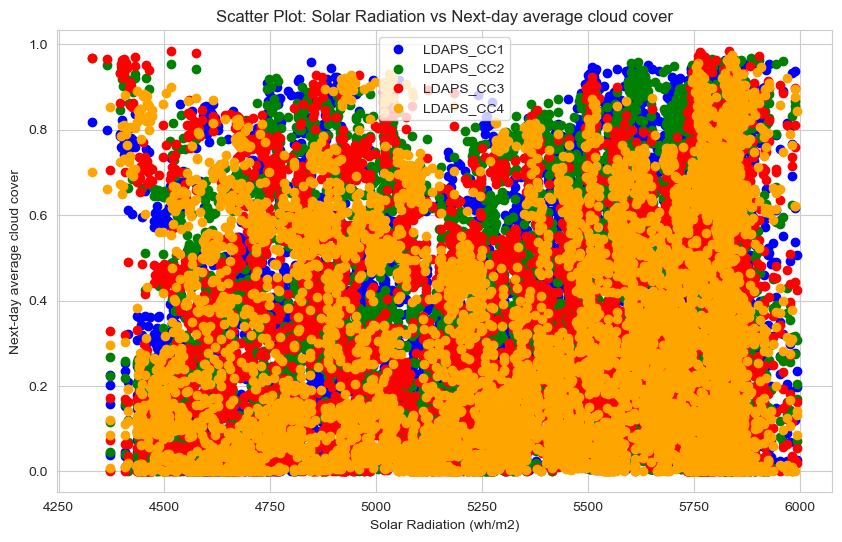

In [35]:
# Plot scatter plot for Solar Radiation vs Next-day average cloud cover
plt.figure(figsize=(10, 6))
plt.scatter(df['Solar radiation'], df['LDAPS_CC1'], color='blue', label='LDAPS_CC1')
plt.scatter(df['Solar radiation'], df['LDAPS_CC2'], color='green', label='LDAPS_CC2')
plt.scatter(df['Solar radiation'], df['LDAPS_CC3'], color='red', label='LDAPS_CC3')
plt.scatter(df['Solar radiation'], df['LDAPS_CC4'], color='orange', label='LDAPS_CC4')

plt.title('Scatter Plot: Solar Radiation vs Next-day average cloud cover')
plt.xlabel('Solar Radiation (wh/m2)')
plt.ylabel('Next-day average cloud cover')
plt.legend()
plt.grid(True)
plt.show()

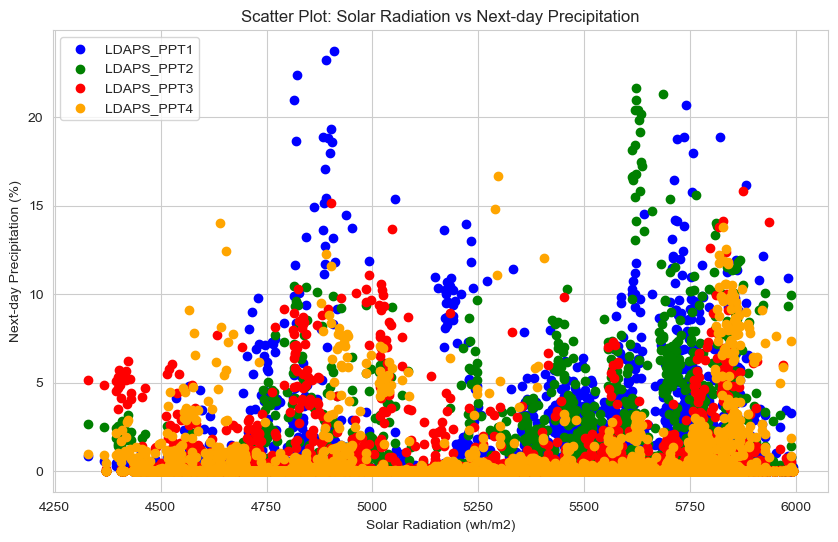

In [36]:
# Plot scatter plot for Solar Radiation vs Next-day Precipitation
plt.figure(figsize=(10, 6))
plt.scatter(df['Solar radiation'], df['LDAPS_PPT1'], color='blue', label='LDAPS_PPT1')
plt.scatter(df['Solar radiation'], df['LDAPS_PPT2'], color='green', label='LDAPS_PPT2')
plt.scatter(df['Solar radiation'], df['LDAPS_PPT3'], color='red', label='LDAPS_PPT3')
plt.scatter(df['Solar radiation'], df['LDAPS_PPT4'], color='orange', label='LDAPS_PPT4')

plt.title('Scatter Plot: Solar Radiation vs Next-day Precipitation')
plt.xlabel('Solar Radiation (wh/m2)')
plt.ylabel('Next-day Precipitation (%)')
plt.legend()
plt.grid(True)
plt.show()

We see that the solar radiation value nearly greater than 5500 wh/m2 leads to higher amount of precipitation.

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


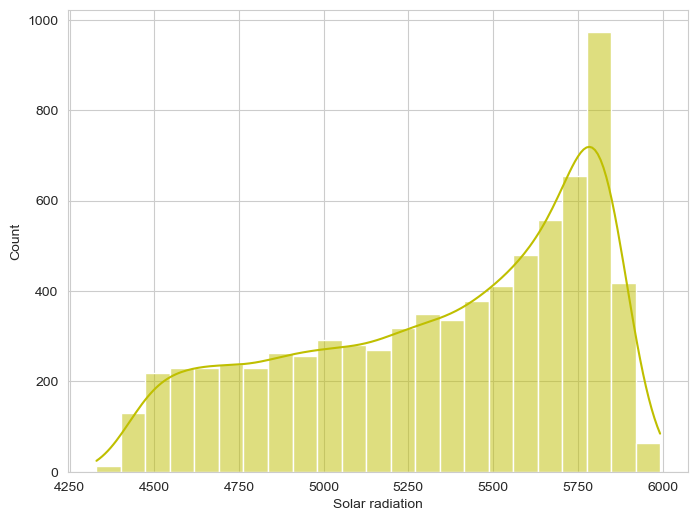

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

Text(0.5, 1.0, 'Minimum relative humidity (%)')

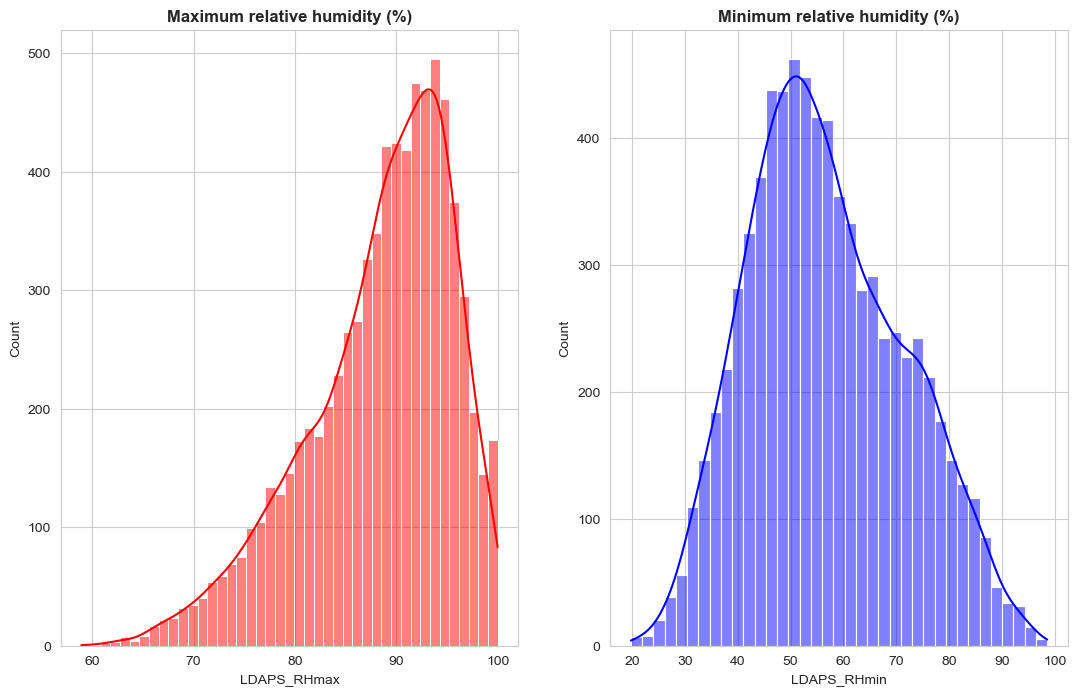

In [38]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=12, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=12, fontweight='bold')

 Maximum relative humidity can be seen in the range of 90-97 and minimum relative humidity lies in the range 40-60.

Text(0.5, 1.0, 'Minimum Tmin applied lapse rate')

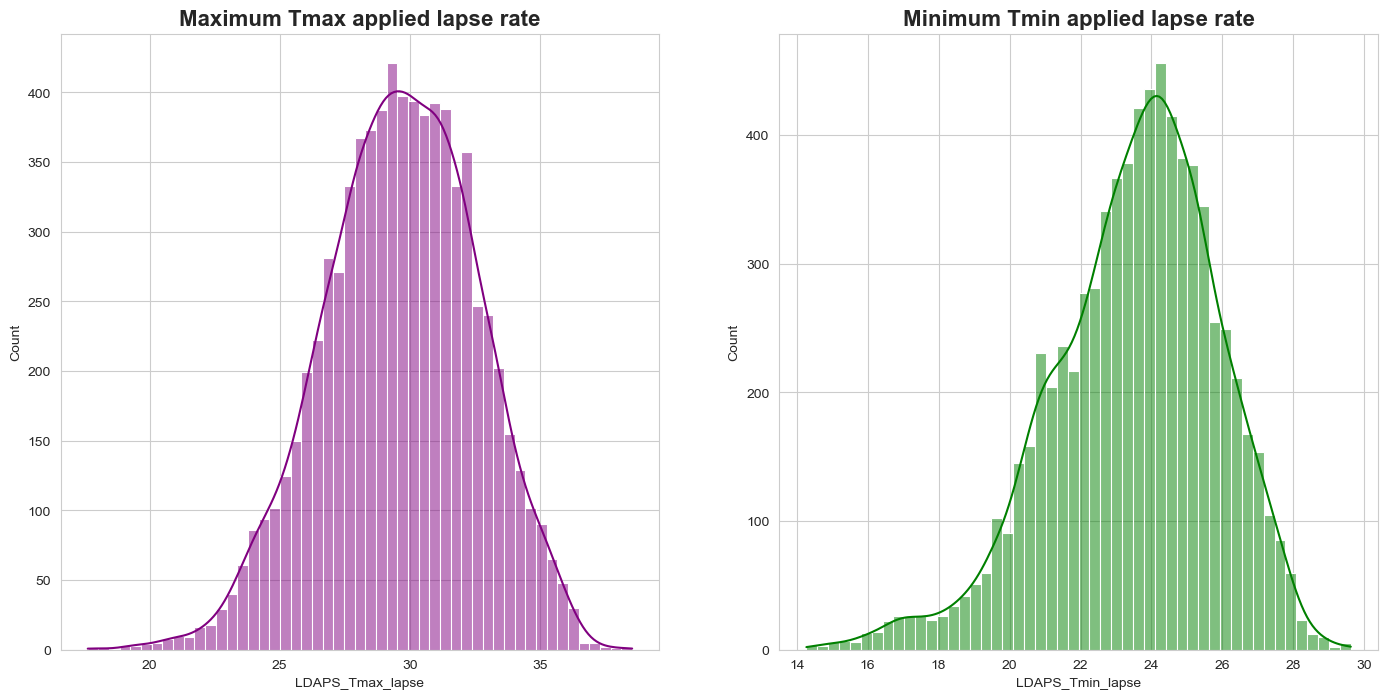

In [39]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=16, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=16, fontweight='bold')

Tmax_lapse for majority days is between 28-34 degrees, while that for Tmin_lapse the range lies in between 22-26.

### Dropping Unnecessary columns.

In [40]:
df.drop(['Date'], axis=1, inplace=True)

# Outlier detection and handling

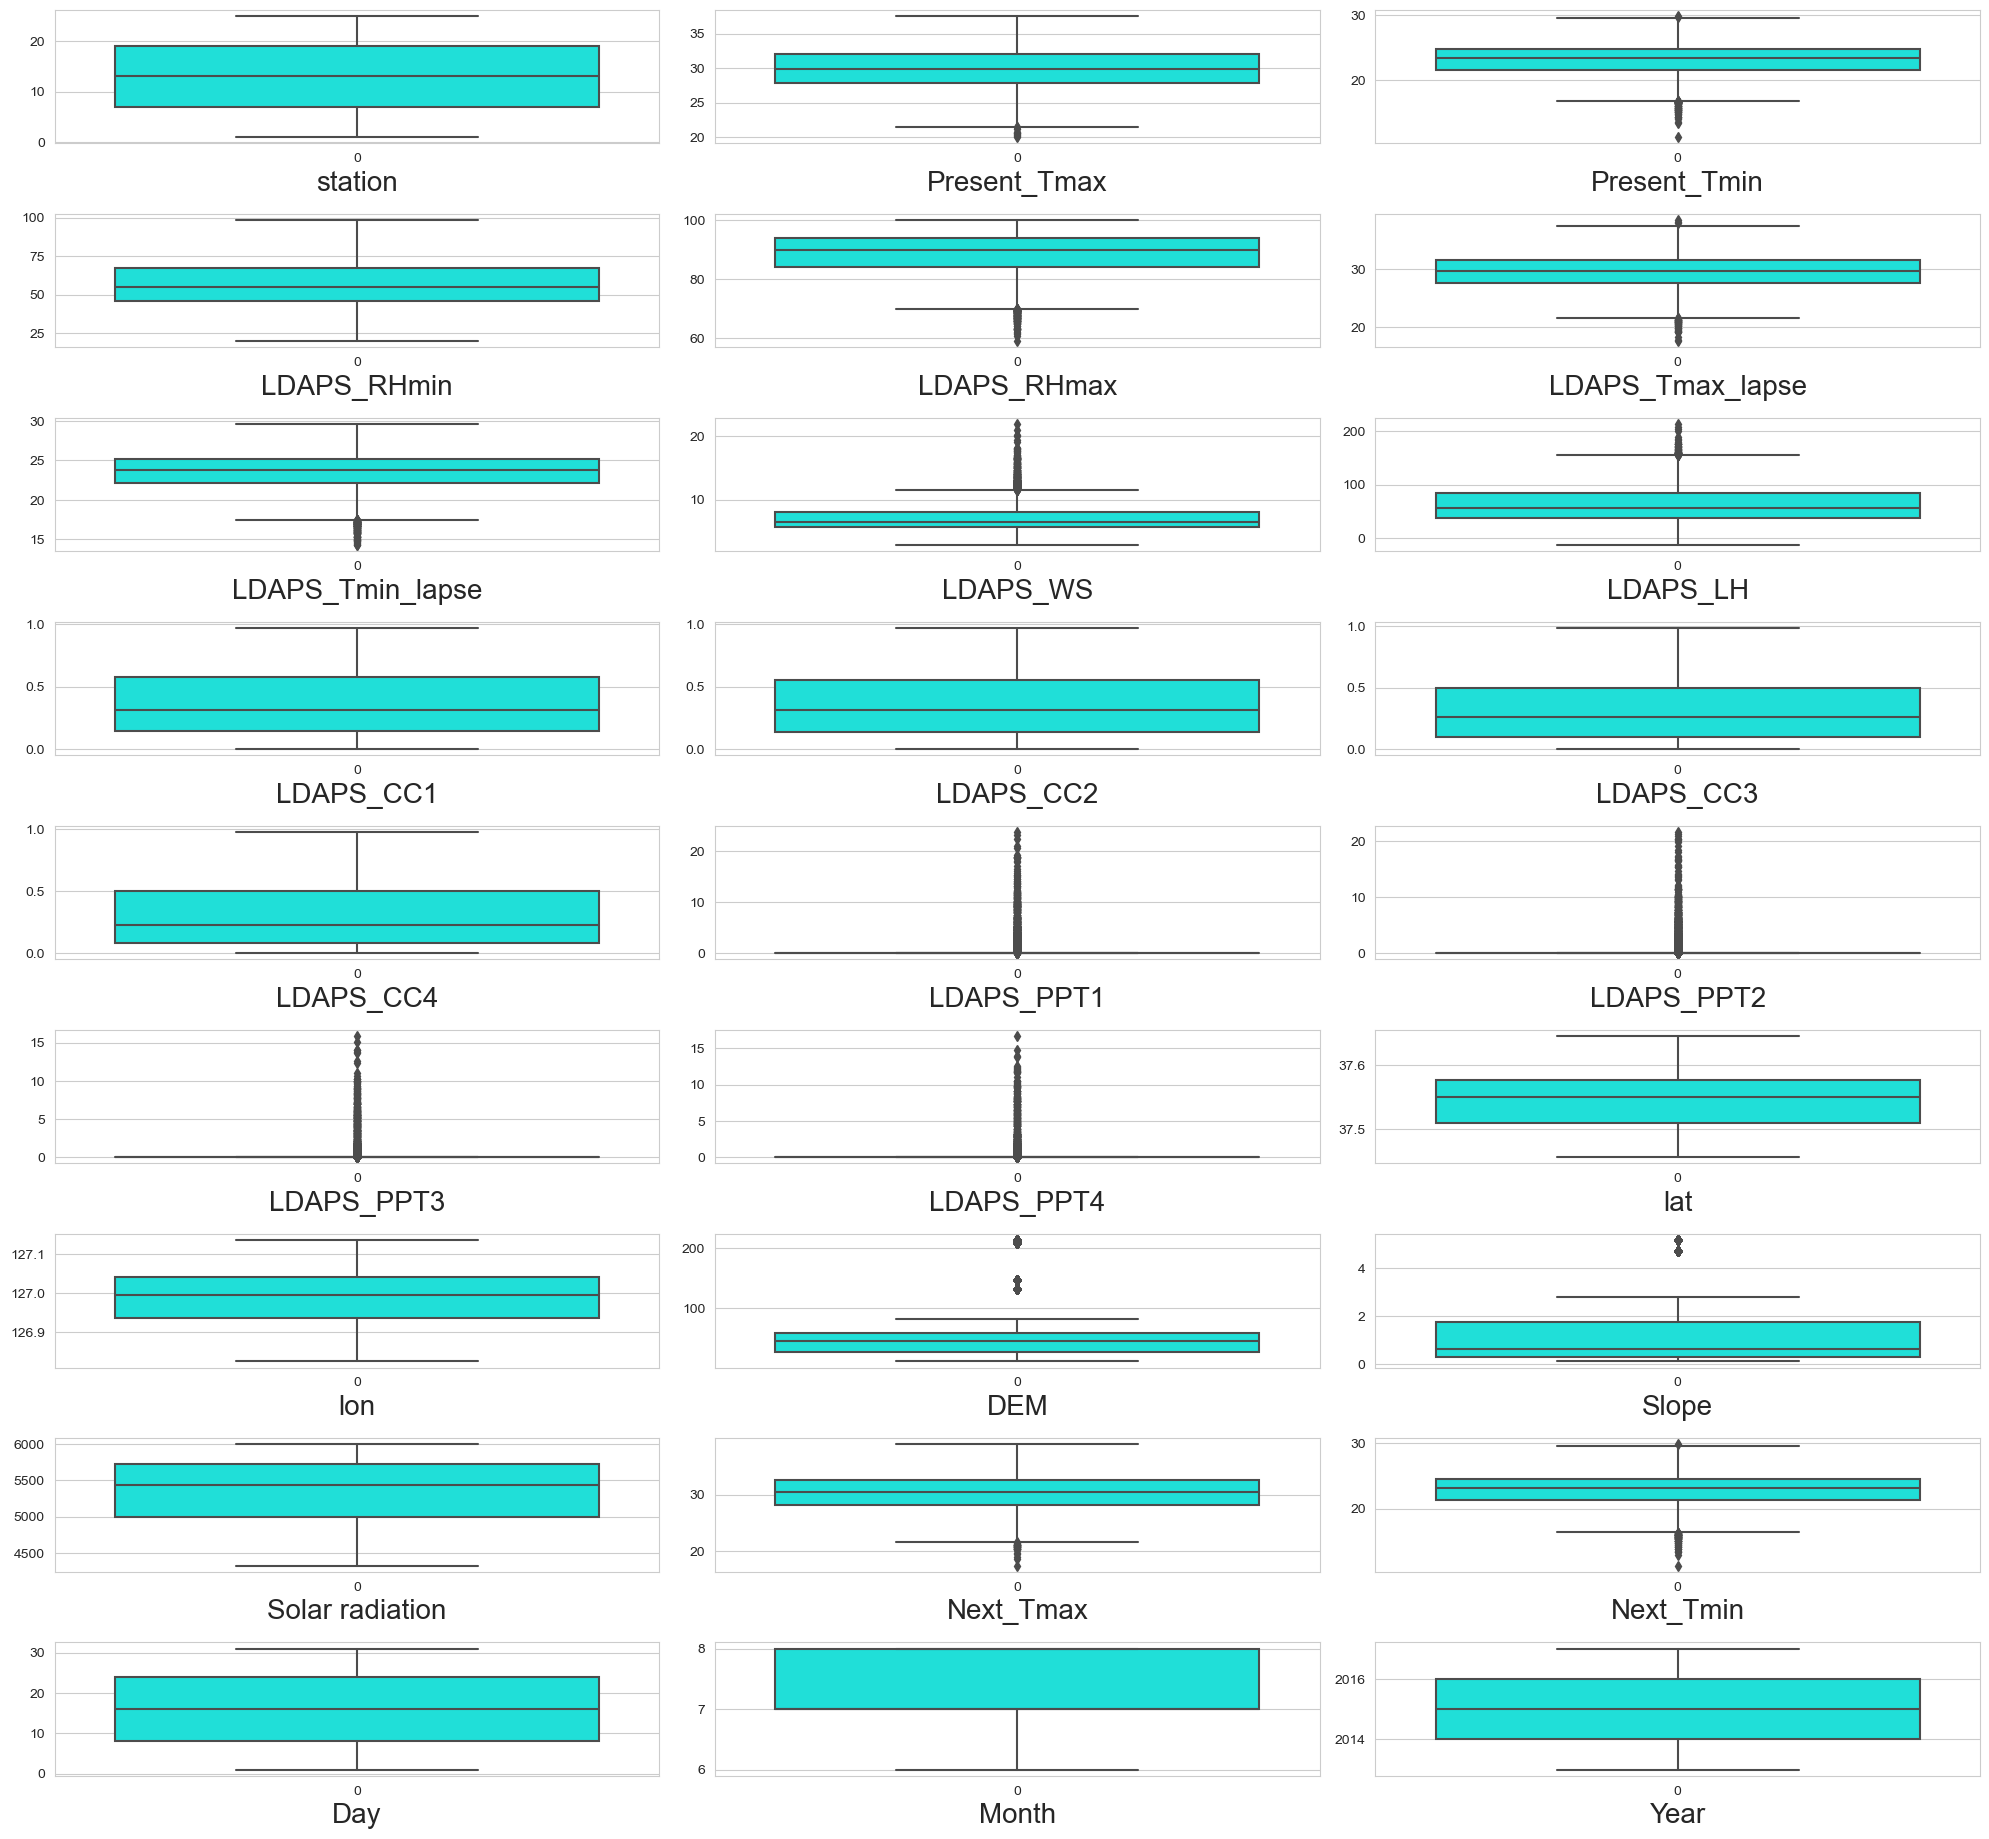

In [41]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=31:
        ax = plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Let's proceed to remove these outliers.

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3

In [43]:
df=df[(z<3).all(axis = 1)]
df.shape

(6739, 27)

In [44]:
# Lets calculate percentage data loss.
((7588-6739)/7588)*100

11.188719030047443

We can see that we have lost nearly 11% of our data, but since our dataset is large and now too we have many rows present.

### Skewness Check

In [45]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
dtype: float64

Since our skewness value has all positive, negative and zero values, lets use yeo-johnson power transformation method.

In [46]:
# Removing skewness using yeo-johnson method to get better prediction
skew = ['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [47]:
df[skew] = scaler.fit_transform(df[skew].values)

In [48]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.087154
Year                0.025066
dtype: float64

For some values we weren't able to remove skewness completely but we reduced them and looks much better than previous one.

# Correlation between Target variable and independent variable

In [49]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.110291,0.133638,-0.069582,-0.182354,0.066863,0.108664,0.030231,-0.135717,0.008671,0.006380,0.006303,0.011510,-0.001774,-0.006798,-0.004884,-0.000285,-0.241811,-0.122829,-0.326019,-0.146034,-0.034787,0.106378,0.129110,0.005032,0.011309,0.006658
Present_Tmax,0.110291,1.000000,0.610428,-0.154266,-0.320074,0.540680,0.623443,-0.071596,0.119022,-0.290078,-0.157917,-0.061417,-0.049978,-0.190222,-0.097425,-0.022348,-0.021344,-0.052041,0.011132,-0.130892,-0.092409,-0.099696,0.586943,0.615950,-0.130708,0.171614,0.099185
Present_Tmin,0.133638,0.610428,1.000000,0.151385,-0.053421,0.441577,0.764041,0.034364,-0.008556,0.090828,0.117894,0.043629,0.000193,0.068506,0.090113,0.035889,-0.063495,-0.072707,-0.043201,-0.238916,-0.157839,-0.047145,0.438813,0.785946,-0.082712,0.104576,0.099222
LDAPS_RHmin,-0.069582,-0.154266,0.151385,1.000000,0.566069,-0.555583,0.114069,0.171684,-0.002412,0.574389,0.713238,0.636195,0.459528,0.410985,0.510241,0.405612,0.244139,0.090054,-0.093969,0.057460,0.083910,0.229070,-0.433872,0.134518,-0.073118,-0.183976,0.001709
LDAPS_RHmax,-0.182354,-0.320074,-0.053421,0.566069,1.000000,-0.403634,-0.182113,0.060965,0.285942,0.425827,0.372085,0.143375,0.046555,0.420202,0.368154,0.219383,0.118163,0.232258,0.013059,0.174176,0.209222,0.154031,-0.323446,-0.110402,-0.014136,-0.134357,-0.146019
LDAPS_Tmax_lapse,0.066863,0.540680,0.441577,-0.555583,-0.403634,1.000000,0.624572,-0.154400,0.005878,-0.416255,-0.492392,-0.468317,-0.367547,-0.307565,-0.344808,-0.285371,-0.207369,-0.038285,0.106354,-0.110286,-0.105094,-0.034699,0.816861,0.553227,-0.139339,0.115992,0.066794
LDAPS_Tmin_lapse,0.108664,0.623443,0.764041,0.114069,-0.182113,0.624572,1.000000,-0.002164,-0.143246,0.023128,0.087752,0.032023,-0.017483,-0.054475,0.021320,-0.018357,-0.084124,-0.091796,-0.025047,-0.174769,-0.160165,0.009890,0.550810,0.873678,-0.141873,0.083247,0.061339
LDAPS_WS,0.030231,-0.071596,0.034364,0.171684,0.060965,-0.154400,-0.002164,1.000000,-0.056362,0.203057,0.156336,0.065764,0.090955,0.197126,0.166155,0.089355,0.167950,-0.027463,-0.077686,0.113157,0.095385,0.164626,-0.205979,0.023330,-0.058922,-0.129418,-0.119526
LDAPS_LH,-0.135717,0.119022,-0.008556,-0.002412,0.285942,0.005878,-0.143246,-0.056362,1.000000,-0.113430,-0.224377,-0.213416,-0.149974,0.017757,-0.061339,0.010756,0.028329,0.100486,0.009790,0.053275,0.069892,-0.032027,0.151784,-0.052365,-0.021563,0.047854,0.054981
LDAPS_CC1,0.008671,-0.290078,0.090828,0.574389,0.425827,-0.416255,0.023128,0.203057,-0.113430,1.000000,0.759430,0.485809,0.332623,0.726938,0.570382,0.300876,0.223193,-0.006352,-0.013794,-0.030080,-0.032476,0.235623,-0.453763,0.008400,-0.046380,-0.226722,-0.069276


<Axes: >

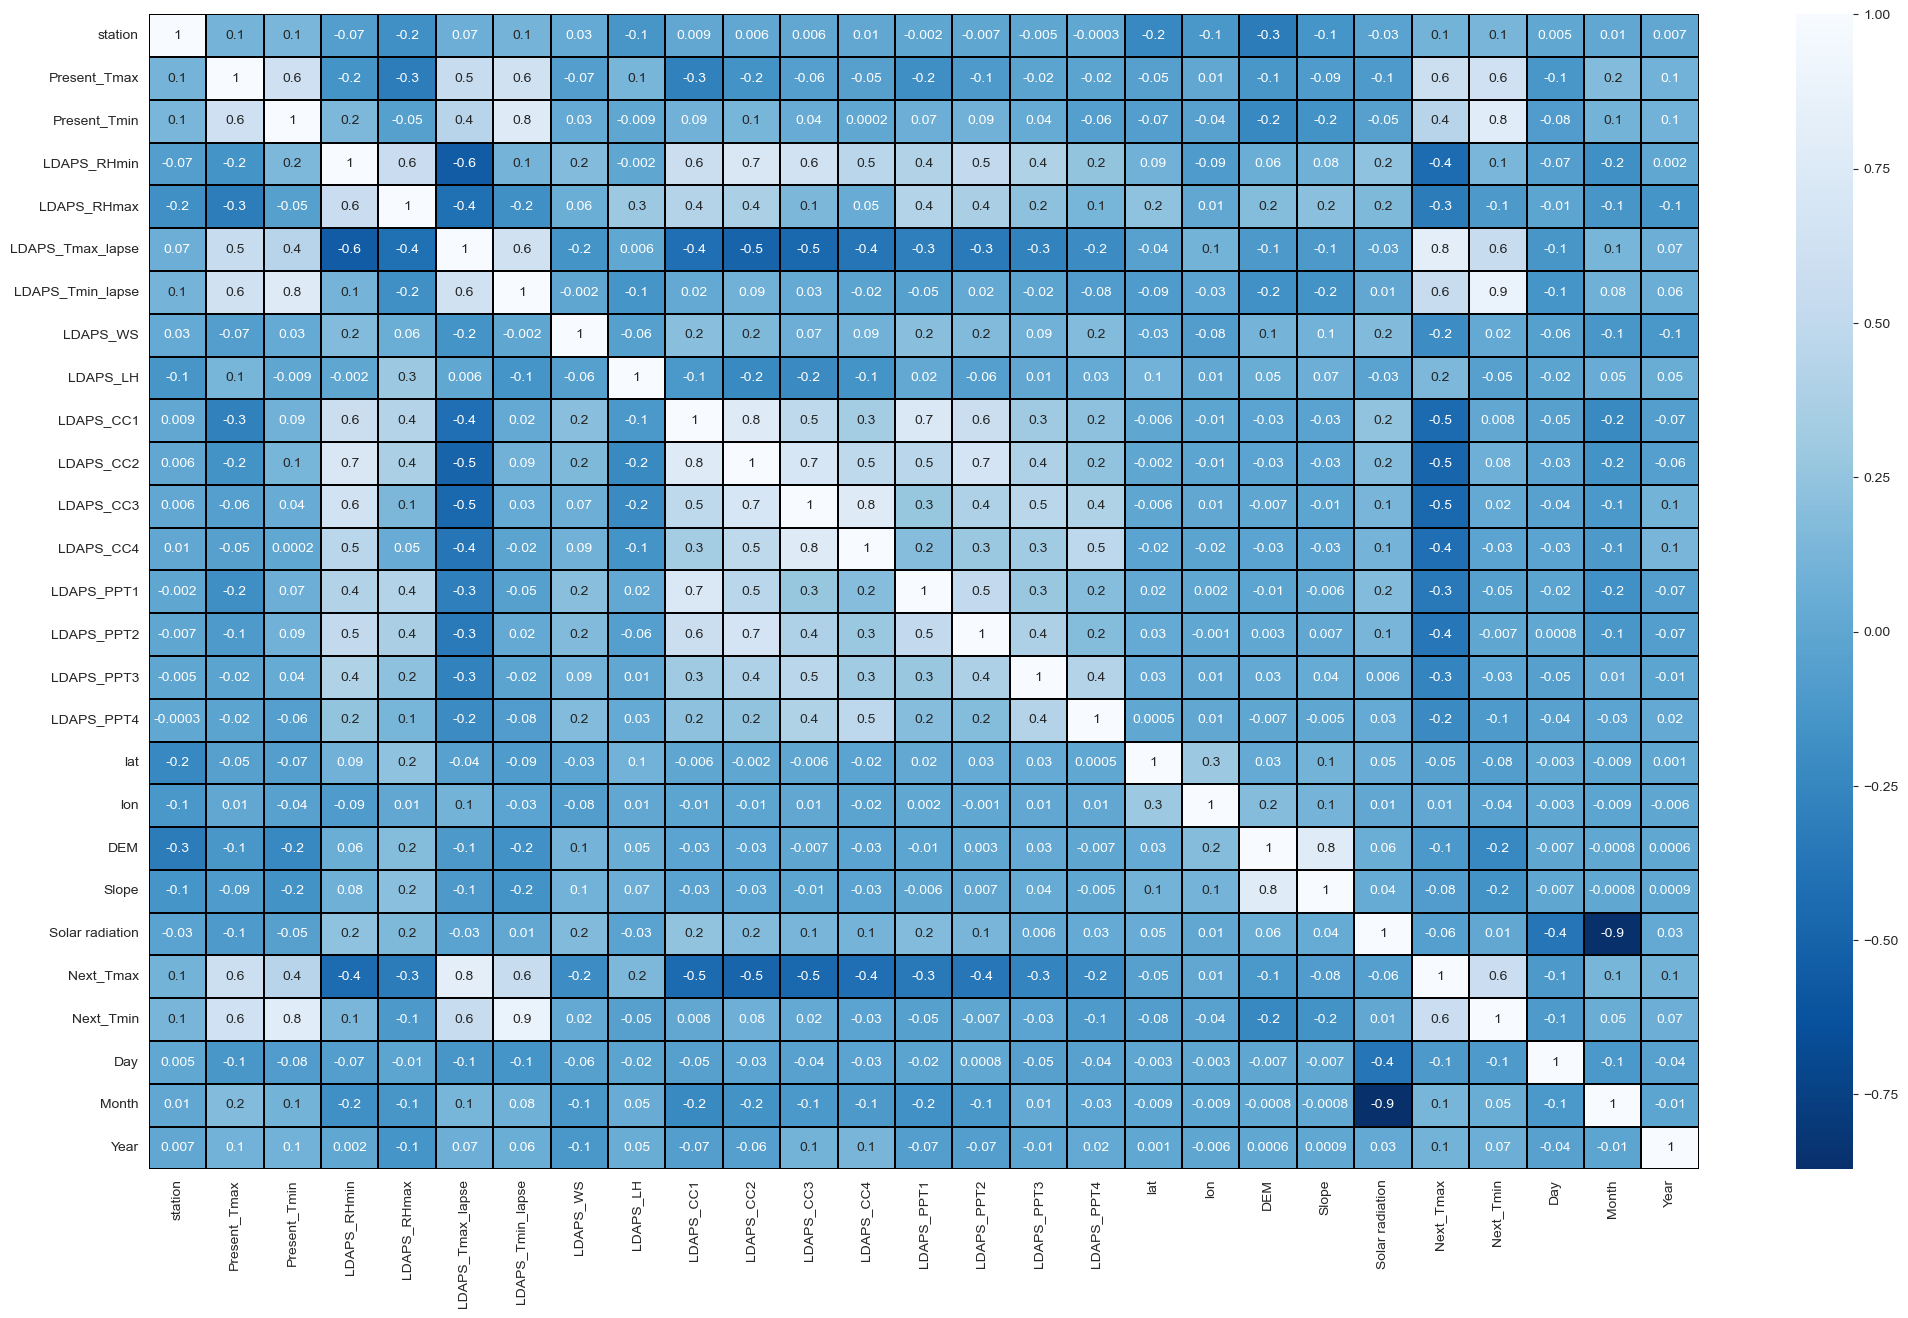

In [50]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

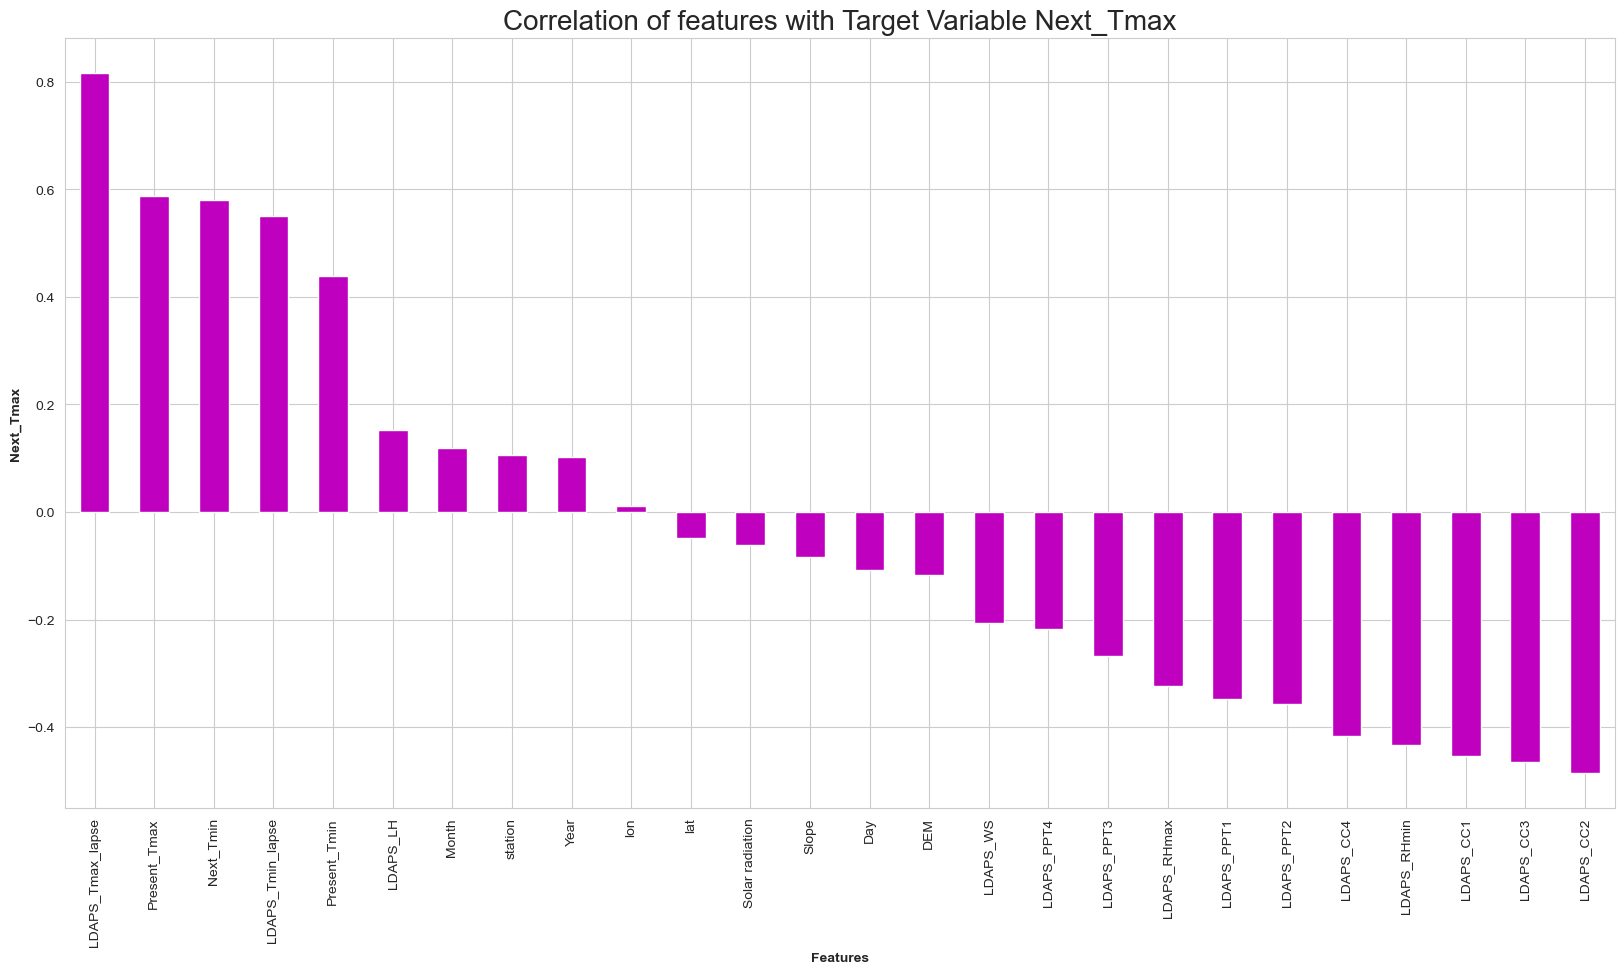

In [51]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize = (20,10))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'm')
plt.xlabel('Features',fontsize=10,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=10,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20)
plt.show()

We can see that, here temperature related feature and cloud cover are more correlated with the target feature.

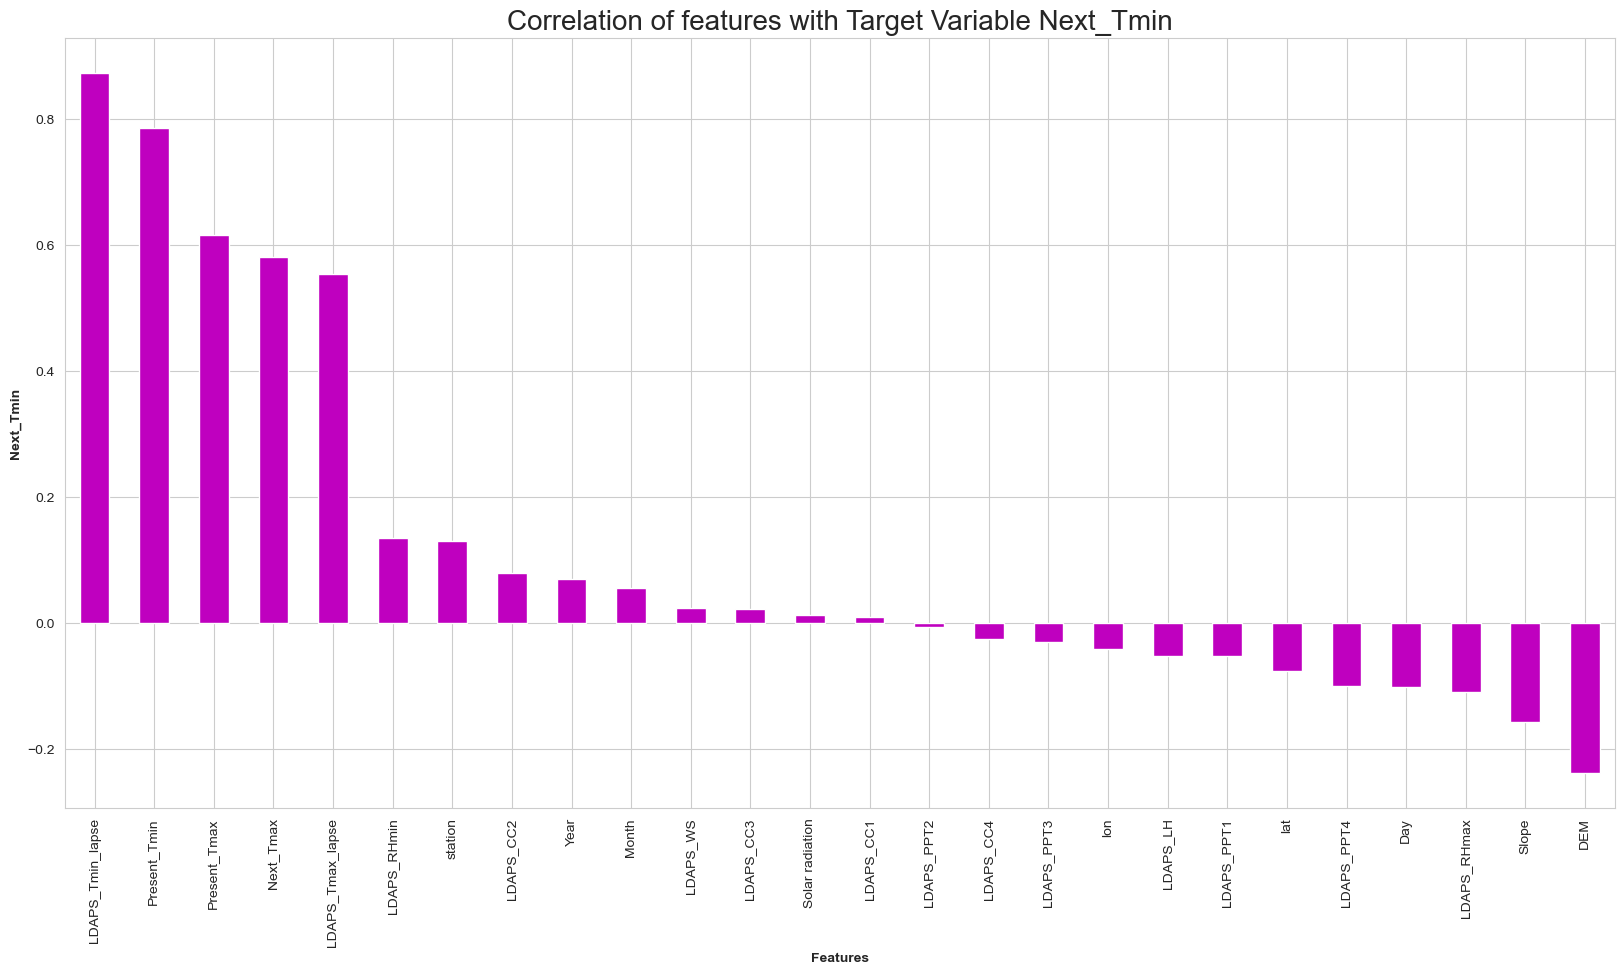

In [52]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize = (20,10))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'm')
plt.xlabel('Features',fontsize=10,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=10,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20)
plt.show()

Here temperature related feature are more correlated as compared to others.

# 1. Model Building for Next_Tmax

### Using Standard Scalarization

In [53]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Using Variance Inflation Factor

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.308903,station
1,2.902352,Present_Tmax
2,3.404251,Present_Tmin
3,6.055263,LDAPS_RHmin
4,2.606760,LDAPS_RHmax
5,6.637758,LDAPS_Tmax_lapse
6,8.233459,LDAPS_Tmin_lapse
7,1.231453,LDAPS_WS
8,1.516456,LDAPS_LH
9,4.866499,LDAPS_CC1


Nearly all the vif values are within the permissible range, lets proceed further.

## Using PCA Technique

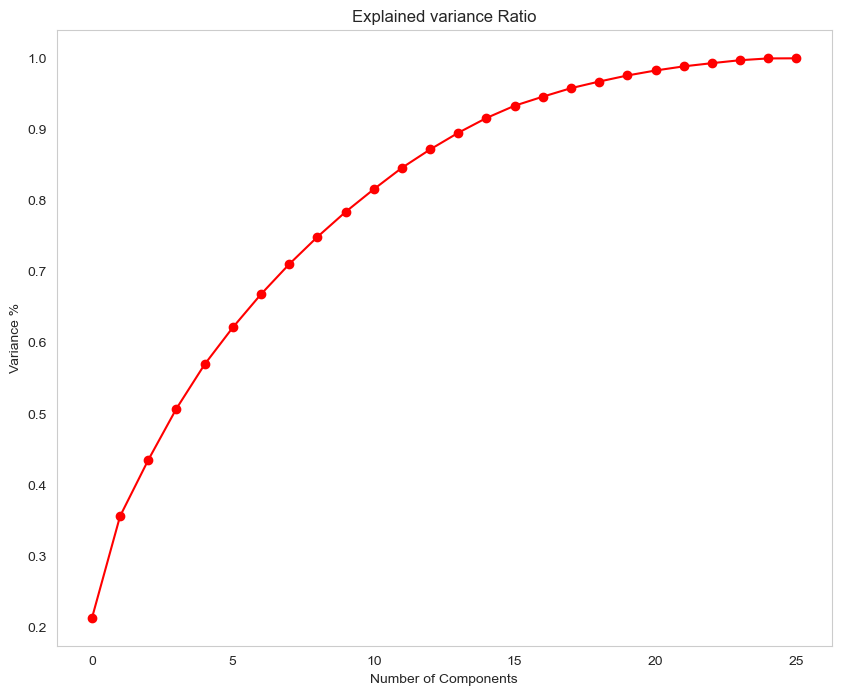

In [56]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Here we can see that nearly 15 principal components contribute for 90% of the variation in our data. Letsconsider taking 15 components for our analysis.

In [57]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [58]:
Principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (5054, 15)
Training target size: (5054,)
Test feature size: (1685, 15)
Test target size: (1685,)


### Finding Best Random State

In [61]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8093566394440032 on Random_state 43


# Linear Regression Model

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [29.08570519 32.36851434 28.23362157 ... 30.32265043 23.98747582
 29.61891944]


Actual Wins:
 5006    28.6
947     33.4
3726    29.8
715     29.3
4242    33.0
        ... 
7073    35.1
5959    33.9
4402    29.5
7354    26.3
7610    29.3
Name: Next_Tmax, Length: 1685, dtype: float64


In [63]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))

print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')

print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.9921799141886302
Mean squared error : 1.691753461961296
Root Mean Squared Error: 1.3006742336039783


 R2 Score :
0.8093566394440032


In [64]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6628440776815404


In [65]:
from sklearn.ensemble import BaggingRegressor

In [66]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)
pred_RFR = RFR.predict(X_test)
pred_train = RFR.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_RFR))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_RFR))
print("Mean squared error: ",mean_squared_error(Y_test, pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_RFR)))

R2_score:  0.9068287490078398
R2_score on training data:  98.5812584742304
Mean Absolute Error:  0.6812106824925814
Mean squared error:  0.8267939988130559
Root Mean Squared Error:  0.9092821337808502


In [67]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)
pred_train = dtc.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_dtc))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_dtc))
print("Mean squared error: ",mean_squared_error(Y_test, pred_dtc))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_dtc)))

R2_score:  0.7850052484955443
R2_score on training data:  100.0
Mean Absolute Error:  0.9958456973293769
Mean squared error:  1.9078456973293767
Root Mean Squared Error:  1.381247876859681


In [68]:
XT = ExtraTreesRegressor()
XT.fit(X_train, Y_train)
pred_XT = XT.predict(X_test)
pred_train = XT.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_XT))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_XT))
print("Mean squared error: ",mean_squared_error(Y_test, pred_XT))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_XT)))

R2_score:  0.9301721273748734
R2_score on training data:  100.0
Mean Absolute Error:  0.6007329376854601
Mean squared error:  0.6196467839762616
Root Mean Squared Error:  0.7871764630476838


In [69]:
BR = BaggingRegressor()
BR.fit(X_train, Y_train)
pred_BR = BR.predict(X_test)
pred_train = BR.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_BR))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_BR))
print("Mean squared error: ",mean_squared_error(Y_test, pred_BR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_BR)))

R2_score:  0.8913990132364318
R2_score on training data:  97.7605501048536
Mean Absolute Error:  0.7327715133531156
Mean squared error:  0.9637162017804153
Root Mean Squared Error:  0.981690481659273


In [70]:
adb=AdaBoostRegressor()
adb.fit(X_train, Y_train)
pred_adb = adb.predict(X_test)
pred_train = adb.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_adb))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_adb))
print("Mean squared error: ",mean_squared_error(Y_test, pred_adb))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_adb)))

R2_score:  0.7703171511120019
R2_score on training data:  76.5696716136435
Mean Absolute Error:  1.1615342633844166
Mean squared error:  2.038186662395053
Root Mean Squared Error:  1.427650749446465


## Cross Validation Score

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
score = cross_val_score(lin_reg,X_scale,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,y_pred) - score.mean())*100)

[0.67684166 0.6846022  0.68339839 0.77323599 0.58315995]
0.6802476385180654
Difference between R2 score and cross validation score is-  12.91090009259378


In [73]:
score_1 = cross_val_score(RFR,X_scale,Y,cv=5,scoring='r2')
print(score_1)
print(score_1.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_RFR) - score_1.mean())*100)

[0.74524353 0.67421476 0.67118689 0.73016921 0.62054271]
0.688271416506791
Difference between R2 score and cross validation score is-  21.85573325010488


In [74]:
score_2 = cross_val_score(dtc,X_scale,Y,cv=5,scoring='r2')
print(score_2)
print(score_2.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_dtc) - score_2.mean())*100)

[0.38740756 0.37505356 0.30558852 0.48413023 0.36479853]
0.38339567738136926
Difference between R2 score and cross validation score is-  40.1609571114175


In [75]:
score_3 = cross_val_score(XT,X_scale,Y,cv=5,scoring='r2')
print(score_3)
print(score_3.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_XT) - score_3.mean())*100)

[0.72576138 0.64272169 0.71302534 0.76611681 0.61287469]
0.6920999829745093
Difference between R2 score and cross validation score is-  23.807214440036418


In [76]:
score_4 = cross_val_score(BR,X_scale,Y,cv=5,scoring='r2')
print(score_4)
print(score_4.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_BR) - score_4.mean())*100)

[0.71011484 0.65475581 0.65390352 0.72407665 0.61881871]
0.6723339047825857
Difference between R2 score and cross validation score is-  21.90651084538461


In [77]:
score_5 = cross_val_score(adb,X_scale,Y,cv=5,scoring='r2')
print(score_5)
print(score_5.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_adb) - score_5.mean())*100)

[0.68034073 0.61346376 0.6562935  0.68194142 0.62480695]
0.6513692718025796
Difference between R2 score and cross validation score is-  11.894787930942229


Since the r2 score of Random forest regressor and Extra tree regressor looks good, we can consider them . But the difference in thr cross validation score and r2 score in case of random forest regressor appears to be less as compared to the extra tree regressor. We will thus proceed with the Random Forest Regressor model and perform hyperparameter tuning.

# Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [80]:
# Create GridSearchCV object
GSCV = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)

In [81]:
# Fit the GridSearchCV object to the training data
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [82]:
GSCV.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

## Final Model

In [85]:
from sklearn.ensemble import RandomForestRegressor
Final_model =  RandomForestRegressor(n_estimators=200 ,bootstrap=False, max_depth= 20, max_features = 'sqrt',
             min_samples_leaf = 1, min_samples_split = 2)
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,pred_RFR))
print('Mean squared error :', mean_squared_error(Y_test,pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,pred_RFR)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,pred_RFR)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.6812106824925814
Mean squared error : 0.8267939988130559
Root Mean Squared Error: 0.9092821337808502


 R2 Score of Final Model :
0.9068287490078398




 True Values Vs Predicted Value plot :


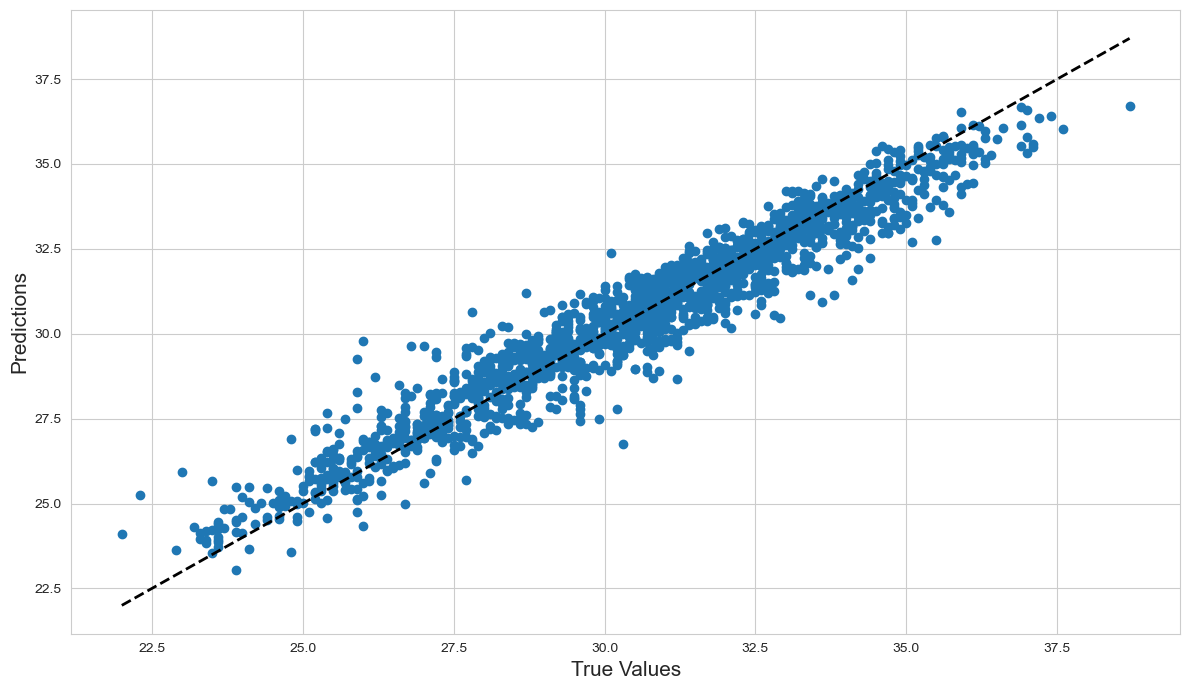

In [87]:
plt.figure(figsize=(12, 7))
y_pred = Final_model.predict(X_test)
plt.scatter(Y_test.round(2), y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plot the diagonal line
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

#### Saving Model

In [89]:
import joblib
joblib.dump(Final_model,'Next_Tmax_Analysis_Model.pkl')

['Next_Tmax_Analysis_Model.pkl']

# Model Building for Next_Tmin

## Standard Scalarization

In [90]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [91]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (5054, 26)
Training target size: (5054,)
Test feature size: (1685, 26)
Test target size: (1685,)


### Finding Best Random State

In [95]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8528556132857731 on Random_state 176


# Linear Regression Model

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=176, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [27.65566182 21.57081897 25.16830362 ... 20.1797222  21.69344604
 25.18825181]


Actual Wins:
 7110    26.3
6291    23.0
5658    25.4
2310    24.6
3241    15.5
        ... 
4593    19.3
491     22.0
5087    20.1
6866    22.1
6046    24.3
Name: Next_Tmin, Length: 1685, dtype: float64


In [98]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.739096368713007
Mean squared error : 0.8664746752985479
Root Mean Squared Error: 0.9308462146340544


 R2 Score :
0.8528556132857731


In [99]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7872619222063713


In [100]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)
pred_RFR = RFR.predict(X_test)
pred_train = RFR.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_RFR))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_RFR))
print("Mean squared error: ",mean_squared_error(Y_test, pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_RFR)))

R2_score:  0.9146163980033966
R2_score on training data:  98.64539282683681
Mean Absolute Error:  0.5412605341246293
Mean squared error:  0.502790017804154
Root Mean Squared Error:  0.7090768772172408


In [101]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)
pred_train = dtc.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_dtc))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_dtc))
print("Mean squared error: ",mean_squared_error(Y_test, pred_dtc))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_dtc)))

R2_score:  0.7885982763715513
R2_score on training data:  100.0
Mean Absolute Error:  0.8214243323442136
Mean squared error:  1.2448605341246293
Root Mean Squared Error:  1.1157331823176315


In [102]:
XT = ExtraTreesRegressor()
XT.fit(X_train, Y_train)
pred_XT = XT.predict(X_test)
pred_train = XT.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_XT))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_XT))
print("Mean squared error: ",mean_squared_error(Y_test, pred_XT))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_XT)))

R2_score:  0.9257301796385867
R2_score on training data:  100.0
Mean Absolute Error:  0.5018836795252224
Mean squared error:  0.4373453851632046
Root Mean Squared Error:  0.6613209396073926


In [103]:
BR = BaggingRegressor()
BR.fit(X_train, Y_train)
pred_BR = BR.predict(X_test)
pred_train = BR.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_BR))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_BR))
print("Mean squared error: ",mean_squared_error(Y_test, pred_BR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_BR)))

R2_score:  0.9012943856341115
R2_score on training data:  97.78923627592039
Mean Absolute Error:  0.5850741839762612
Mean squared error:  0.5812380415430267
Root Mean Squared Error:  0.7623896913934676


In [104]:
adb=AdaBoostRegressor()
adb.fit(X_train, Y_train)
pred_adb = adb.predict(X_test)
pred_train = adb.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_adb))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_adb))
print("Mean squared error: ",mean_squared_error(Y_test, pred_adb))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_adb)))

R2_score:  0.8228859947022988
R2_score on training data:  81.2393244087698
Mean Absolute Error:  0.8319967810793297
Mean squared error:  1.0429538201086739
Root Mean Squared Error:  1.021251105315766


## Cross Validation Score

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
score = cross_val_score(lin_reg,X_scale,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,y_pred) - score.mean())*100)

[0.75743627 0.67407187 0.79322917 0.86926946 0.86644208]
0.792089770128066
Difference between R2 score and cross validation score is-  6.076584315770706


In [107]:
score_1 = cross_val_score(RFR,X_scale,Y,cv=5,scoring='r2')
print(score_1)
print(score_1.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_RFR) - score_1.mean())*100)

[0.71767558 0.69871241 0.80821378 0.87648154 0.85784562]
0.791785787257641
Difference between R2 score and cross validation score is-  12.283061074575553


In [108]:
score_2 = cross_val_score(dtc,X_scale,Y,cv=5,scoring='r2')
print(score_2)
print(score_2.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_dtc) - score_2.mean())*100)

[0.48019702 0.44399939 0.61201022 0.78011539 0.66891581]
0.597047565454736
Difference between R2 score and cross validation score is-  19.15507109168153


In [109]:
score_3 = cross_val_score(XT,X_scale,Y,cv=5,scoring='r2')
print(score_3)
print(score_3.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_XT) - score_3.mean())*100)

[0.72051088 0.6951393  0.80876252 0.87688496 0.87675427]
0.795610384657137
Difference between R2 score and cross validation score is-  13.011979498144976


In [110]:
score_4 = cross_val_score(BR,X_scale,Y,cv=5,scoring='r2')
print(score_4)
print(score_4.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_BR) - score_4.mean())*100)

[0.70822207 0.66539452 0.79211935 0.85869586 0.83597713]
0.7720817860152052
Difference between R2 score and cross validation score is-  12.92125996189063


In [111]:
score_5 = cross_val_score(adb,X_scale,Y,cv=5,scoring='r2')
print(score_5)
print(score_5.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_adb) - score_5.mean())*100)

[0.68669674 0.6153691  0.75574531 0.82109214 0.83927891]
0.7436364378660805
Difference between R2 score and cross validation score is-  7.924955683621837


Here both Random forest regressor and Extra tree regressor are looking good. The r2 score of extra tree regressor is good but the difference in the cross val score in case of random forest regressor is less(12)  as compared to that of extra tree regressor that is 13. So proceeding with the Random forest Regressor.

# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [0, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    
}

In [114]:
# Create GridSearchCV object
GSCV = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)

In [115]:
# Fit the GridSearchCV object to the training data
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [0, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [116]:
GSCV.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

## Final Model

In [117]:
from sklearn.ensemble import RandomForestRegressor
Final_model =  RandomForestRegressor(n_estimators=100 , max_depth= 20, max_features = 'sqrt',
             min_samples_leaf = 1, min_samples_split = 2)
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,pred_RFR))
print('Mean squared error :', mean_squared_error(Y_test,pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,pred_RFR)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,pred_RFR)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.5412605341246293
Mean squared error : 0.502790017804154
Root Mean Squared Error: 0.7090768772172408


 R2 Score of Final Model :
0.9146163980033966




 True Values Vs Predicted Value plot :


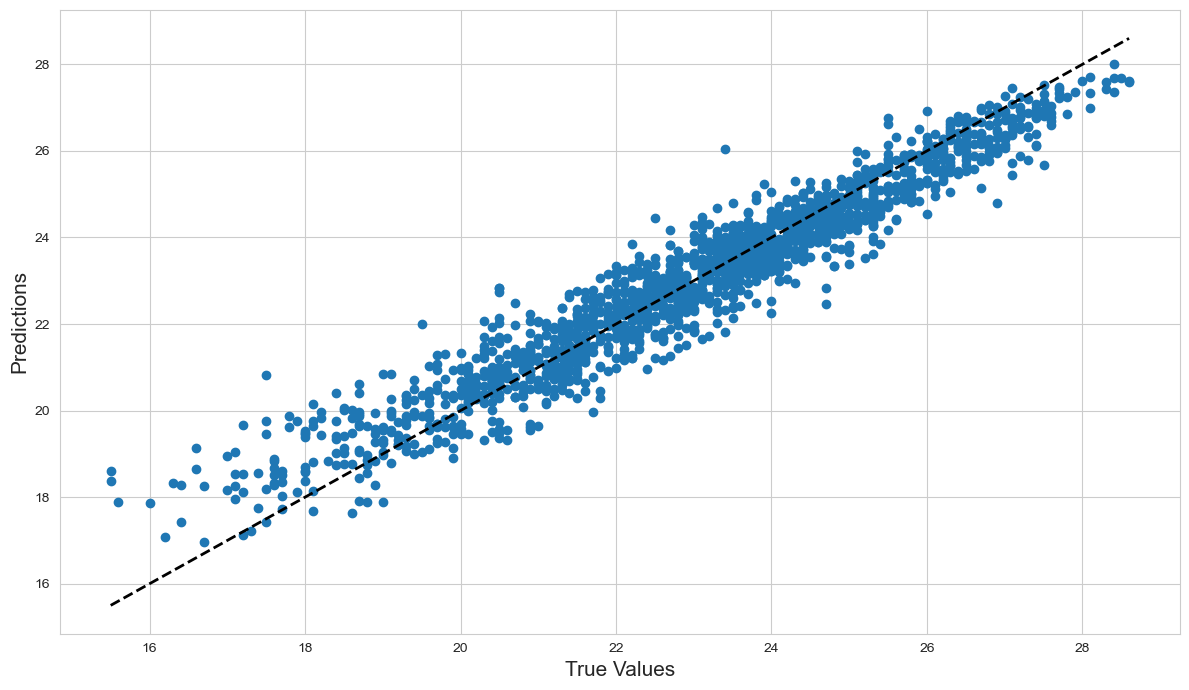

In [118]:
plt.figure(figsize=(12, 7))
y_pred = Final_model.predict(X_test)
plt.scatter(Y_test.round(2), y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plot the diagonal line
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

In [122]:
import joblib
Model=joblib.dump(Final_model,'Next_Tmin_Analysis_Final.pkl')